<a href="https://colab.research.google.com/github/mattia-sandrini/deep-learning-book/blob/master/Linear_Regression/linear-regression-from-scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install mxnet
!pip install d2l==0.11.4

In [0]:
import d2l
import mxnet
from mxnet import autograd, nd
import random
mxnet.npx.set_np()

In [0]:
def synthetic_data(w, b, num_examples):
  X = nd.random.normal(scale=1, shape=(num_examples, len(w)))
  y = nd.dot(X, w) + b
  y += nd.random.normal(scale=0.01, shape=y.shape)
  return X, y

true_w = nd.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [33]:
features[0], labels[0]

(
 [2.2122064 0.7740038]
 <NDArray 2 @cpu(0)>, 
 6.000587
 <NDArray  @cpu(0)>)

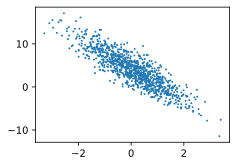

In [35]:
# Generate a scatter lot of the second feature (second column vector of X)
d2l.set_figsize((3.5, 2.5))
d2l.plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)

In [0]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(0, num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    j = nd.array([indices[i: min(i+batch_size, num_examples)]])
    yield features.take(j), labels.take(j)


In [0]:
# Initialize the parameters
w = nd.random.normal(scale=0.01, shape=(2, 1))
b = nd.zeros(shape=(1,))


In [0]:
# Inform the autograd to know that it should store a gradient for our parameters
w.attach_grad()
b.attach_grad()

In [0]:
# Define the model
def linreg(X, w, b):
  return nd.dot(X, w) + b

# Define the square loss function
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2 / 2

# Define optimization algorithm (Stochastic gradient Descend)
def sgd(params, lr, batch_size):
  for param in params:
    param[:] = param - lr * param.grad / batch_size

In [62]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
  print(f"Epoch {epoch+1}")
  for X, y in data_iter(batch_size, features, labels):
    # X: <NDArray 1x10x2>
    # y: <NDArray 1x10>
    with autograd.record():
      l = loss(net(X, w, b), y)   # <NDArray 1x10x1>
    l.backward() # Compute gradient on l with respect to [w, b]
    sgd([w, b], lr, batch_size)  # Update parameters
  train_l = loss(net(features, w, b), labels)
  print('\tTraining Loss: %f' % train_l.mean().asnumpy()) 

print('\n\nError in estimating w', true_w - w.reshape(true_w.shape))
print('\nError in estimating b', true_b - b)  

Epoch 1
	Training Loss: 0.040763
Epoch 2
	Training Loss: 0.000150
Epoch 3
	Training Loss: 0.000051


Error in estimating w 
[2.3806095e-04 2.3841858e-05]
<NDArray 2 @cpu(0)>

Error in estimating b 
[0.00112915]
<NDArray 1 @cpu(0)>
